In [1]:
import glob
import matplotlib.pyplot as plt
import json

In [11]:
def plot(h_tilde):
    files = glob.glob('./experiments/fasttext/*_h' + str(h_tilde) + '.json')
    files = sorted(files, key=(lambda x: float(x.split('_V')[1].split('_h')[0])))

    plt.figure(3)
    fig, axs = plt.subplots(1, len(files), figsize=(50, 6))

    count = 0
    for fname in files:
        with open(fname, 'r') as f:
            d = json.load(f)
        
        V_str = fname.split('_V')[1].split('_h')[0]
        
        x = []
        acc = []
        energy = []
        model = []
        
        for item in d:
            x.append(item['iteration'])
            acc.append(item['chosen_models_avg_accuracy'])
            energy.append(item['chosen_models_avg_energy'])
            model.append(item['chosen_model'])

        category_counts = {}
        for category in model:
            if category in category_counts:
                category_counts[category] += 1
            else:
                category_counts[category] = 1
        
        category_names = list(category_counts.keys())
        counts = list(category_counts.values())
        

        ax = axs[count]
        ax.bar(category_names, counts)
        ax.set_title('h_tilde=' + str(h_tilde) + ', V=' + V_str)
        ax.set_xlabel('Model')
        ax.set_ylabel('Frequency')
        
        # plt.xlabel('Model')
        # plt.ylabel('Frequency')
        # plt.title('h_tilde=' + str(h_tilde) + ', V=' + V_str)
        
        plt.figure(1)
        plt.plot(x, acc, label='V='+V_str)
        plt.legend()
        plt.title('h_tilde=' + str(h_tilde))
        plt.xlabel('Steps')
        plt.ylabel('Average accuracy')
        plt.grid(True)
        
        plt.figure(2)
        plt.plot(x, energy, label='V='+V_str)
        plt.legend()
        plt.title('h_tilde=' + str(h_tilde))
        plt.xlabel('Steps')
        plt.ylabel('Average energy')
        plt.grid(True)

        count += 1

    plt.figure(1)
    plt.savefig('acc_h_tilde' + str(h_tilde) + '.png', bbox_inches='tight')

    plt.figure(2)
    plt.savefig('energy_h_tilde' + str(h_tilde) + '.png', bbox_inches='tight')

    plt.figure(3)
    fig.savefig('hist_h_tilde' + str(h_tilde) + '.png', bbox_inches='tight')


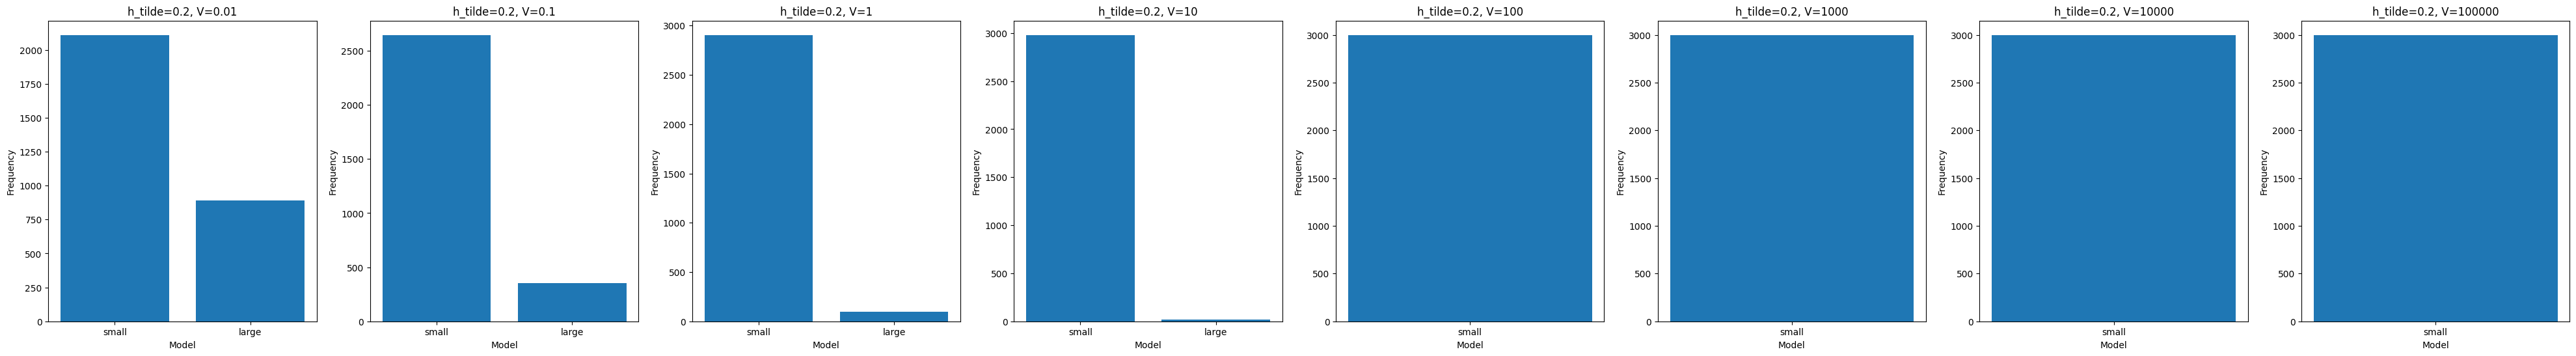

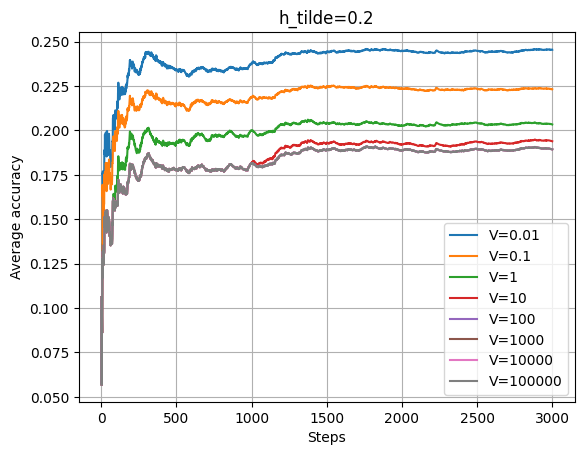

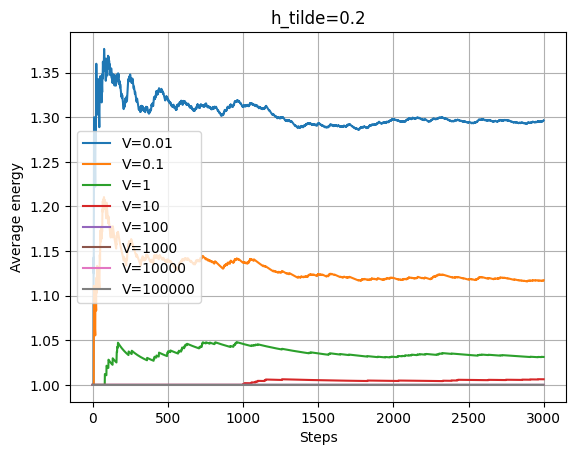

<Figure size 640x480 with 0 Axes>

In [12]:
plot(0.2)

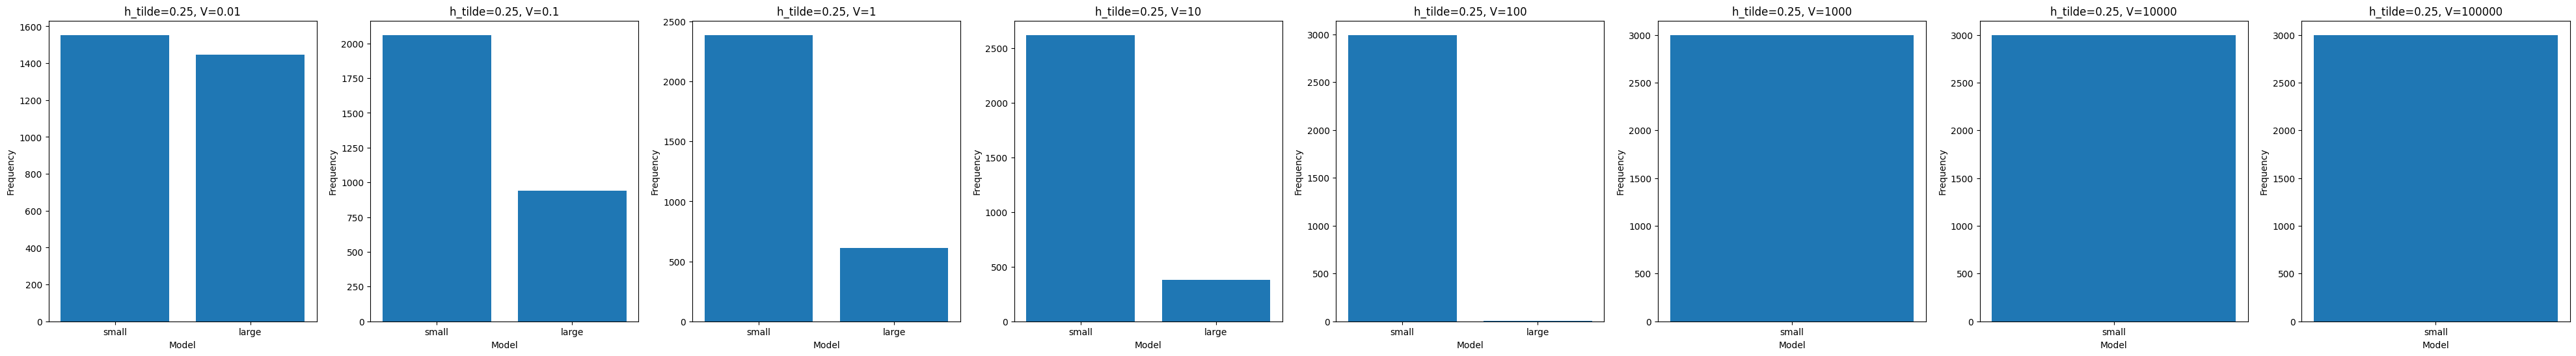

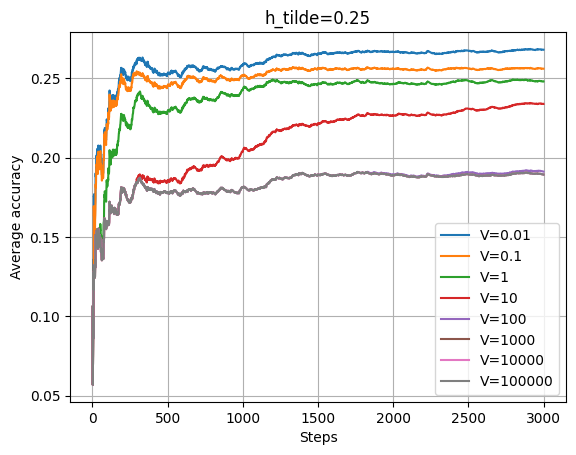

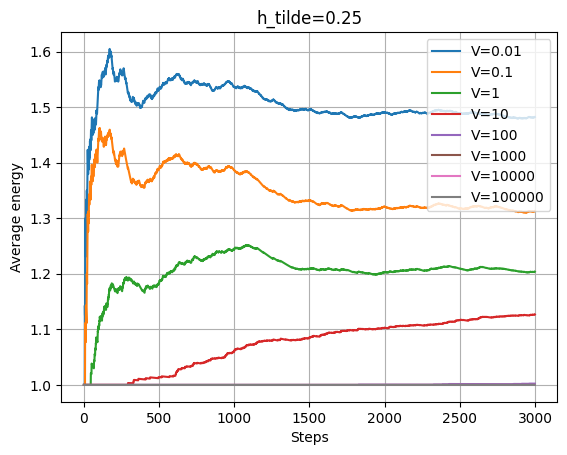

<Figure size 640x480 with 0 Axes>

In [13]:
plot(0.25)